In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
import pandas as pd

df_hilal = pd.read_csv('hilal_rent_listings.csv')
df_dubizzle = pd.read_csv('dubizzle_rent_listings.csv')


In [3]:
print("Hilal Data:")
df_hilal.info()
df_hilal.isnull().sum()

Hilal Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_title   173 non-null    object
 1   location         168 non-null    object
 2   number_of_rooms  168 non-null    object
 3   price            173 non-null    object
 4   size             6 non-null      object
dtypes: object(5)
memory usage: 6.9+ KB


property_title       0
location             5
number_of_rooms      5
price                0
size               167
dtype: int64

In [4]:
print("\nDubizzle Data:")
df_dubizzle.info()
df_dubizzle.isnull().sum()


Dubizzle Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5355 entries, 0 to 5354
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_title   5355 non-null   object
 1   location         5355 non-null   object
 2   number_of_rooms  4304 non-null   object
 3   price            5331 non-null   object
 4   size             5355 non-null   object
dtypes: object(5)
memory usage: 209.3+ KB


property_title        0
location              0
number_of_rooms    1051
price                24
size                  0
dtype: int64

In [5]:
print("Hilal Columns:", df_hilal.columns.tolist())
print("Dubizzle Columns:", df_dubizzle.columns.tolist())

Hilal Columns: ['property_title', 'location', 'number_of_rooms', 'price', 'size']
Dubizzle Columns: ['property_title', 'location', 'number_of_rooms', 'price', 'size']


In [6]:
combined_df = pd.concat([df_hilal, df_dubizzle], ignore_index=True)

In [7]:
combined_df.to_csv('combined_rent_listings.csv', index=False, encoding='utf-8-sig')
print("Combined data saved to 'combined_rent_listings.csv'")

Combined data saved to 'combined_rent_listings.csv'


In [8]:
combined_df.head(10)

,property_title,location,number_of_rooms,price,size
0,2-BEDROOM APARTMENT,Al Ansab,2,OMR300,NaN
1,2-BEDROOM APARTMENT,Shatti Al Qurum,2,OMR500,NaN
2,4+1 BEDROOM TWIN VILLA,Madinat Qaboos (MQ),4,"OMR1,500",NaN
3,COMMERCIAL SHOP,Ghala,39,OMR370,NaN
4,COMMERCIAL OFFICE SPACE,Bausher,2,OMR4,NaN
5,"2, 3 & 4-BEDROOM COMPOUND VILLAS",Rusayl,"2,3,4",OMR650,NaN
6,COMMERCIAL SPACE,Shatti Al Qurum,NaN,OMR6,NaN
7,6+1 BEDROOM TWIN VILLA,Bausher,6,"OMR1,000",NaN
8,5+1 BEDROOM TWIN VILLA,Al Ansab,5,OMR750,NaN
9,RETAIL SPACES,Al Khuwair,NaN,OMR7,NaN


In [9]:
combined_df.isnull().sum()

property_title        0
location              5
number_of_rooms    1056
price                24
size                167
dtype: int64

In [10]:
combined_df.dtypes

property_title     object
location           object
number_of_rooms    object
price              object
size               object
dtype: object

In [11]:
combined_df.columns

Index(['property_title', 'location', 'number_of_rooms', 'price', 'size'], dtype='object')

In [12]:
combined_df.shape

(5528, 5)

In [13]:
combined_df.describe()

,property_title,location,number_of_rooms,price,size
count,5528,5523,4472,5504,5361
unique,4736,100,33,449,558
top,room for rent,"Salalah, Dhofar•",1,OMR 50,100 SQM
freq,38,565,1575,384,396


### Column1 property_title	

In [14]:
combined_df['property_title'].unique()

array(['2-BEDROOM APARTMENT', '4+1 BEDROOM TWIN VILLA', 'COMMERCIAL SHOP',
       ..., 'Room For Rent With Attach Barth Room',
       '2 bhk furniture for rent in mq',
       'single executive room only for ladies'], dtype=object)

In [15]:
combined_df['property_title'].isnull().sum()

np.int64(0)

In [16]:
combined_df.shape

(5528, 5)

In [17]:
# Normalize the 'property_title' column by converting to string,
# stripping leading/trailing whitespace, and converting all text to lowercase
# to ensure consistent and case-insensitive keyword matching.
combined_df['property_title'] = combined_df['property_title'].astype(str).str.strip().str.lower()

def extract_property_type(title):
    """
    Extract the property type keyword from a given property title.
    Searches first in English keywords, then Arabic keywords.
    Returns the exact keyword found.
    Returns None if no keyword is matched, resulting in a null value in pandas.
    """

    # List of English keywords commonly used in property titles
    english_keywords = [
        'apartment', 'flat', 'apartments', 'rooms', 'room',
        'villa',
        'townhouse',
        'studio',
        'duplex',
        'penthouse',
        'compound',
        'office', 'offices', 'office space', 'office spaces',
        'shop', 'shops', 'showroom', 'retail', 'store',
        'warehouse', 'storage',
        'gym', 'pool',
        'space',
        'building',
        'farm',
        'hall',
        'tent',
        'container',
        'basement',
        'land',
        'bed space',
        'home',
        'rest house',
        'bedroom',
        'flat for rent',
        'store for rent',
        'villa for rent',
        'home for rent',
        'farm for rent',
        'land for rent'
    ]

    # List of Arabic keywords commonly used in property titles
    arabic_keywords = [
        'شقة', 'شقق',
        'فيلا',
        'تاون هاوس',
        'استوديو',
        'مكتب', 'مكاتب',
        'محل', 'محلات', 'محلين',
        'مستودع', 'مخزن',
        'جيم', 'مسبح', 'بول',
        'قاعة',
        'غرفة', 'غرف', 'غرفتين',
        'أرض',
        'مجمع',
        'مبنى',
        'استراحة',
        'بيت',
        'معرض',
        'سكن'
    ]

    # Search for any English keyword in the title string
    for word in english_keywords:
        if word in title:
            return word

    # If no English keyword found, search Arabic keywords
    for word in arabic_keywords:
        if word in title:
            return word

    # Return None if no keywords matched; pandas will treat this as NaN (null)
    return None

# Apply the extraction function on the 'property_title' column
# Create a new column 'property_type' that holds the extracted keyword or null
combined_df['property_type'] = combined_df['property_title'].apply(extract_property_type)

# NOTE:
# Do NOT filter out rows with null values in 'property_type' to keep all rows intact.
# Rows with no matched keywords will have null (NaN) in 'property_type'.

# Optional: To check row counts and nulls
print(f"Total rows: {len(combined_df)}")
print(f"Rows with identified property_type: {combined_df['property_type'].notnull().sum()}")
print(f"Rows with null property_type: {combined_df['property_type'].isnull().sum()}")


Total rows: 5528
Rows with identified property_type: 4581
Rows with null property_type: 947


## property_type

In [18]:
combined_df['property_type'].unique

<bound method Series.unique of 0       apartment
1       apartment
2            room
3            shop
4          office
          ...    
5523         room
5524         room
5525         room
5526         None
5527         room
Name: property_type, Length: 5528, dtype: object>

In [19]:
combined_df['property_type'].shape

(5528,)

In [20]:
# Extract property type
combined_df['property_type'] = combined_df['property_title'].apply(extract_property_type)

# Arabic to English translation dictionary
arabic_to_english_map = {
    'شقة': 'apartment',
    'شقق': 'apartment',
    'فيلا': 'villa',
    'تاون هاوس': 'townhouse',
    'استوديو': 'studio',
    'مكتب': 'office',
    'مكاتب': 'office',
    'محل': 'shop',
    'محلات': 'shop',
    'محلين': 'shop',
    'مستودع': 'warehouse',
    'مخزن': 'warehouse',
    'جيم': 'gym',
    'مسبح': 'pool',
    'بول': 'pool',
    'قاعة': 'hall',
    'غرفة': 'room',
    'غرف': 'room',
    'غرفتين': 'room',
    'أرض': 'land',
    'مجمع': 'compound',
    'مبنى': 'building',
    'استراحة': 'rest house',
    'بيت': 'home',
    'معرض': 'showroom',
    'سكن': 'residence'
}

def unify_property_type(ptype):
    if ptype in arabic_to_english_map:
        return arabic_to_english_map[ptype]
    else:
        return ptype

# Translate Arabic property types to English in the same column
combined_df['property_type'] = combined_df['property_type'].apply(unify_property_type)

In [21]:
most_common_type = combined_df['property_type'].mode()[0]
combined_df['property_type'] = combined_df['property_type'].fillna(most_common_type)

In [22]:
combined_df['property_type'].unique()

array(['apartment', 'room', 'shop', 'office', 'space', 'retail', 'villa',
       'townhouse', 'warehouse', 'flat', 'rooms', 'land', 'building',
       'duplex', 'penthouse', 'studio', 'store', 'pool', 'compound',
       'rest house', 'home', 'residence', 'showroom', 'farm', 'hall',
       'storage', 'gym'], dtype=object)

In [23]:
null_count = combined_df['property_type'].isnull().sum()
print(f"Number of null values in 'property_type': {null_count}")

Number of null values in 'property_type': 0


In [24]:
combined_df.describe()

,property_title,location,number_of_rooms,price,size,property_type
count,5528,5523,4472,5504,5361,5528
unique,4674,100,33,449,558,27
top,room for rent,"Salalah, Dhofar•",1,OMR 50,100 SQM,room
freq,93,565,1575,384,396,2025


In [25]:
# Step 1: Convert to lowercase and strip whitespace
combined_df['property_type'] = combined_df['property_type'].str.lower().str.strip()

In [26]:
# Define refined mapping
refined_mapping = {
    'room': 'room',
    'apartment': 'apartment',
    'studio': 'studio',
    'villa': 'villa',
    'townhouse': 'villa',
    'duplex': 'villa',
    'rest house': 'villa',
    
    'home': 'house',
    'residence': 'house',
    
    'compound': 'compound',
    
    'commercial': 'commercial',
    'store': 'commercial',
    'retail': 'commercial',
    'showroom': 'commercial',
    'hall': 'commercial',
    'space': 'commercial',
    
    'building': 'building',
    'office': 'commercial',
    
    'penthouse': 'apartment',
    
    'land': 'land',
    'farm': 'land',
    
    'industrial': 'industrial',
    'storage': 'industrial',
    
    'gym': 'other',
    'pool': 'other',
}

# Apply mapping
combined_df['property_type'] = combined_df['property_type'].replace(refined_mapping)

# Optional: See cleaned unique types
print(combined_df['property_type'].value_counts())

property_type
room          2025
apartment     1057
villa          805
commercial     636
flat           395
shop           238
rooms           83
studio          71
house           63
warehouse       57
land            49
building        29
other           12
compound         4
industrial       4
Name: count, dtype: int64


In [27]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
combined_df['property_type_encoded'] = le.fit_transform(combined_df['property_type'])

In [28]:
combined_df.dtypes

property_title           object
location                 object
number_of_rooms          object
price                    object
size                     object
property_type            object
property_type_encoded     int64
dtype: object

## Location

In [29]:
combined_df['location'].unique()


array(['Al Ansab', 'Shatti Al Qurum', 'Madinat Qaboos (MQ)', 'Ghala',
       'Bausher', 'Rusayl', 'Al Khuwair', nan, 'Azaiba', 'Maabelah',
       'Al Ghoubrah', 'Darsait', 'Al Mawaleh', 'Madinat Al llam',
       'Muscat Hills', 'The Wave Muscat', 'Qurum', 'Al Hail', 'Al Khoudh',
       'Ruwi', 'Salalah', 'MUSCAT BAY', 'Al Mouj', 'Mutrah', 'Al Awabi',
       'Seeb', 'Muscat', 'Nizwa', 'Qurum, Muscat•', 'Azaiba, Muscat•',
       'Bosher, Muscat•', 'Muscat Hills, Muscat•',
       'The Wave (Almouj), Muscat•', 'Al Khoud, Muscat•',
       'Al Maabilah, Muscat•', 'Al Seeb, Muscat•', 'Darsait, Muscat•',
       'Ruwi, Muscat•', 'Al Amarat, Muscat•',
       'Madinat As Sultan Qaboos, Muscat•', 'Al Ghubrah, Muscat•',
       'Al Khuwair, Muscat•', 'Al Hail, Muscat•', 'Al Mawaleh, Muscat•',
       'Al Wadi Al Kabir, Muscat•', 'Misfah, Muscat•',
       'Muscat - Other, Muscat•', 'Salalah, Dhofar•', 'Ghala, Muscat•',
       'Barka, Al Batinah•', 'Al Rusayl, Muscat•', 'Ansab, Muscat•',
       'Barr A

In [30]:
null_count = combined_df['location'].isnull().sum()
print(f"Number of null values in 'location': {null_count}")

Number of null values in 'location': 5


In [31]:
combined_df = combined_df.dropna(subset=['location'])

In [32]:
import pandas as pd

def clean_location(loc):
    if pd.isna(loc):
        return 'unknown'
    loc = loc.lower().replace('•', '').strip()  # حذف العلامة وتحويل لصغير ومسح فراغات
    if ',' in loc:
        loc = loc.split(',')[0].strip()  # خذ الجزء قبل الفاصلة فقط
    return loc

combined_df['location_clean'] = combined_df['location'].apply(clean_location)

# عرض القيم الفريدة بعد التنظيف
print(combined_df['location_clean'].unique())
print(combined_df['location_clean'].value_counts().head(20))

['al ansab' 'shatti al qurum' 'madinat qaboos (mq)' 'ghala' 'bausher'
 'rusayl' 'al khuwair' 'azaiba' 'maabelah' 'al ghoubrah' 'darsait'
 'al mawaleh' 'madinat al llam' 'muscat hills' 'the wave muscat' 'qurum'
 'al hail' 'al khoudh' 'ruwi' 'salalah' 'muscat bay' 'al mouj' 'mutrah'
 'al awabi' 'seeb' 'muscat' 'nizwa' 'bosher' 'the wave (almouj)'
 'al khoud' 'al maabilah' 'al seeb' 'al amarat' 'madinat as sultan qaboos'
 'al ghubrah' 'al wadi al kabir' 'misfah' 'muscat - other' 'barka'
 'al rusayl' 'ansab' 'barr al jissah' 'sohar' 'qantab' 'al hamriyah'
 'al duqum' 'al bustan' 'al sifah' 'liwa' 'al buraimi' 'al khaboura'
 "ja'alan bani bu ali" 'sur' 'taqah' 'yiti' 'izki' 'yunqul' 'qurayyat'
 'saham' 'ibri' 'masira' 'rakhyut' 'al qabil' 'al kamil and al waafi'
 "al masn'a" 'suwaiq' 'bidbid' 'sadab' 'khasab' 'al mudaibi' 'al sinainah'
 'shalim and the hallaniyat island' 'haima' 'adam' 'shinas' 'sadah'
 'mirbat' "al 'awabi" 'sumail' 'ibra' 'sultan haitham city' 'bahla'
 'mahdhah' 'al rustaq

In [33]:
combined_df.shape

(5523, 8)

In [34]:
# Dictionary of replacements to unify and correct location names
replace_dict = {
    'bausher': 'bosher',
    'maabelah': 'al maabilah',
    'al ghoubrah': 'al ghubrah',
    'madinat qaboos (mq)': 'madinat qaboos',
    'madinat as sultan qaboos': 'madinat sultan qaboos',
    'ansab': 'al ansab',
    'al khoudh': 'al khoud',
    'the wave muscat': 'the wave',
    'the wave (almouj)': 'the wave',
    'muscat - other': 'muscat',
    'madinat al llam': 'madinat al illam',
    "al kamil and al waafi": "al kamil waafi",
    'masira': 'masirah',
    'nakhl': 'nakhal',
    "al masn'a": 'alMusanaa',
    'shalim and the hallaniyat island': 'shalim and the hallaniyat islands',
    "al 'awabi": 'al awabi',
    'al seeb': 'seeb',
    # Also unify some common names as they are correct
    'madinat al illam': 'madinat al illam',
    'bidiya': 'bidiya',
    'ibra': 'ibra',
    'salalah': 'salalah',
    'sohar': 'sohar',
    'mutrah': 'mutrah',
    'qurum': 'qurum',
    'seeb': 'seeb',
    'bosher': 'bosher',
    'ruwi': 'ruwi',
    'al maabilah': 'al maabilah',
    'al amarat': 'al amarat',
    'barka': 'barka',
    'al wadi al kabir': 'al wadi al kabir',
    'al hail': 'al hail',
    'ghala': 'ghala',
    'madinat sultan qaboos': 'madinat sultan qaboos',
}

# Apply the replacements on the 'location_clean' column
combined_df['location_clean'] = combined_df['location_clean'].replace(replace_dict)

# Print the unique cleaned location names and their counts to verify
print(combined_df['location_clean'].unique())
print(combined_df['location_clean'].value_counts().head(20))


['al ansab' 'shatti al qurum' 'madinat qaboos' 'ghala' 'bosher' 'rusayl'
 'al khuwair' 'azaiba' 'al maabilah' 'al ghubrah' 'darsait' 'al mawaleh'
 'madinat al illam' 'muscat hills' 'the wave' 'qurum' 'al hail' 'al khoud'
 'ruwi' 'salalah' 'muscat bay' 'al mouj' 'mutrah' 'al awabi' 'seeb'
 'muscat' 'nizwa' 'al amarat' 'madinat sultan qaboos' 'al wadi al kabir'
 'misfah' 'barka' 'al rusayl' 'barr al jissah' 'sohar' 'qantab'
 'al hamriyah' 'al duqum' 'al bustan' 'al sifah' 'liwa' 'al buraimi'
 'al khaboura' "ja'alan bani bu ali" 'sur' 'taqah' 'yiti' 'izki' 'yunqul'
 'qurayyat' 'saham' 'ibri' 'masirah' 'rakhyut' 'al qabil' 'al kamil waafi'
 'alMusanaa' 'suwaiq' 'bidbid' 'sadab' 'khasab' 'al mudaibi' 'al sinainah'
 'shalim and the hallaniyat islands' 'haima' 'adam' 'shinas' 'sadah'
 'mirbat' 'sumail' 'ibra' 'sultan haitham city' 'bahla' 'mahdhah'
 'al rustaq' 'bidiya' 'nakhal' 'manah' 'al mazyona']
location_clean
salalah                  567
al khuwair               439
qurum               

In [35]:
combined_df['location_clean'].unique()


array(['al ansab', 'shatti al qurum', 'madinat qaboos', 'ghala', 'bosher',
       'rusayl', 'al khuwair', 'azaiba', 'al maabilah', 'al ghubrah',
       'darsait', 'al mawaleh', 'madinat al illam', 'muscat hills',
       'the wave', 'qurum', 'al hail', 'al khoud', 'ruwi', 'salalah',
       'muscat bay', 'al mouj', 'mutrah', 'al awabi', 'seeb', 'muscat',
       'nizwa', 'al amarat', 'madinat sultan qaboos', 'al wadi al kabir',
       'misfah', 'barka', 'al rusayl', 'barr al jissah', 'sohar',
       'qantab', 'al hamriyah', 'al duqum', 'al bustan', 'al sifah',
       'liwa', 'al buraimi', 'al khaboura', "ja'alan bani bu ali", 'sur',
       'taqah', 'yiti', 'izki', 'yunqul', 'qurayyat', 'saham', 'ibri',
       'masirah', 'rakhyut', 'al qabil', 'al kamil waafi', 'alMusanaa',
       'suwaiq', 'bidbid', 'sadab', 'khasab', 'al mudaibi', 'al sinainah',
       'shalim and the hallaniyat islands', 'haima', 'adam', 'shinas',
       'sadah', 'mirbat', 'sumail', 'ibra', 'sultan haitham city',
      

In [36]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit and transform the location_clean column
combined_df['location_encoded'] = le.fit_transform(combined_df['location_clean'])

# Optional: View the mapping of labels to original names
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Location Label Mapping:")
print(label_mapping)

# Preview result
print(combined_df[['location_clean', 'location_encoded']].head())

Location Label Mapping:
{'adam': np.int64(0), 'al amarat': np.int64(1), 'al ansab': np.int64(2), 'al awabi': np.int64(3), 'al buraimi': np.int64(4), 'al bustan': np.int64(5), 'al duqum': np.int64(6), 'al ghubrah': np.int64(7), 'al hail': np.int64(8), 'al hamriyah': np.int64(9), 'al kamil waafi': np.int64(10), 'al khaboura': np.int64(11), 'al khoud': np.int64(12), 'al khuwair': np.int64(13), 'al maabilah': np.int64(14), 'al mawaleh': np.int64(15), 'al mazyona': np.int64(16), 'al mouj': np.int64(17), 'al mudaibi': np.int64(18), 'al qabil': np.int64(19), 'al rusayl': np.int64(20), 'al rustaq': np.int64(21), 'al sifah': np.int64(22), 'al sinainah': np.int64(23), 'al wadi al kabir': np.int64(24), 'alMusanaa': np.int64(25), 'azaiba': np.int64(26), 'bahla': np.int64(27), 'barka': np.int64(28), 'barr al jissah': np.int64(29), 'bidbid': np.int64(30), 'bidiya': np.int64(31), 'bosher': np.int64(32), 'darsait': np.int64(33), 'ghala': np.int64(34), 'haima': np.int64(35), 'ibra': np.int64(36), 'ibri

In [37]:
combined_df.dtypes

property_title           object
location                 object
number_of_rooms          object
price                    object
size                     object
property_type            object
property_type_encoded     int64
location_clean           object
location_encoded          int64
dtype: object

### number_of_rooms

In [38]:
# extract numeric values
combined_df['number_of_rooms_clean'] = combined_df['number_of_rooms'].str.extract(r'(\d+)').astype(float)

In [39]:
combined_df['number_of_rooms_clean'] = pd.to_numeric(combined_df['number_of_rooms'], errors='coerce')

In [40]:
print(combined_df['number_of_rooms_clean'].value_counts())

number_of_rooms_clean
1.00       1575
2.00       1208
3.00        575
4.00        429
5.00        334
6.00        161
7.00         70
8.00         27
9.00         10
10.00         9
12.00         6
350.00        2
200.00        1
51.63         1
39.00         1
55.00         1
415.00        1
143.00        1
84.00         1
47.50         1
5000.00       1
97.00         1
1400.00       1
75.00         1
32.00         1
120.00        1
11.00         1
Name: count, dtype: int64


In [41]:
combined_df.dtypes

property_title            object
location                  object
number_of_rooms           object
price                     object
size                      object
property_type             object
property_type_encoded      int64
location_clean            object
location_encoded           int64
number_of_rooms_clean    float64
dtype: object

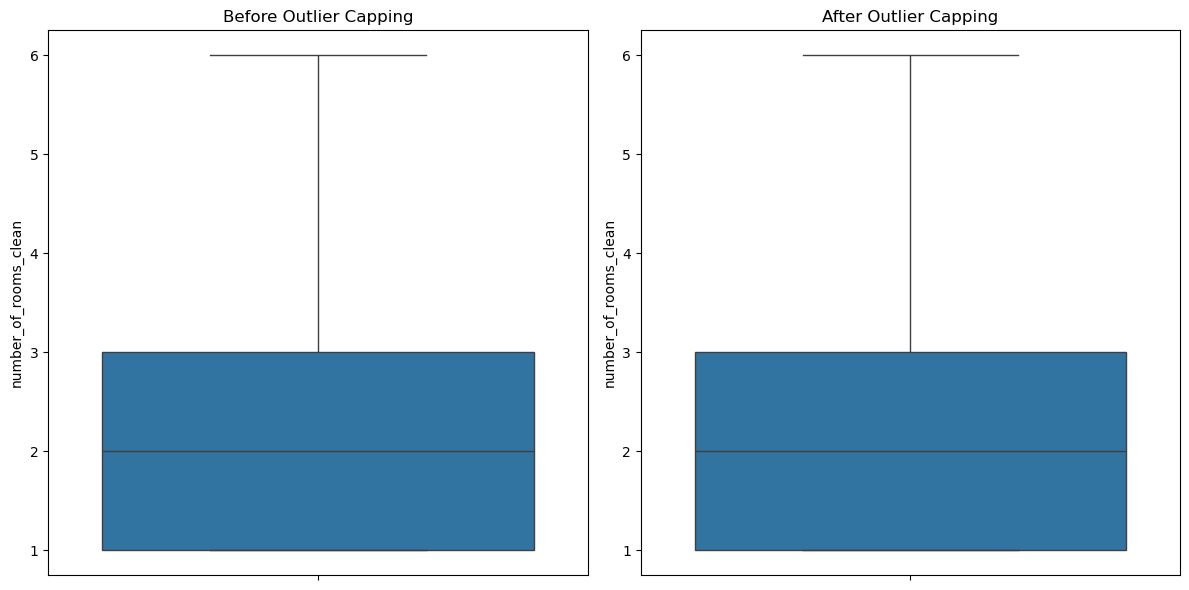

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate IQR
Q1 = combined_df['number_of_rooms_clean'].quantile(0.25)
Q3 = combined_df['number_of_rooms_clean'].quantile(0.75)
IQR = Q3 - Q1

# Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers (Winsorization)
combined_df['number_of_rooms_clean'] = combined_df['number_of_rooms_clean'].clip(lower=lower_bound, upper=upper_bound)

# Plot before and after
plt.figure(figsize=(12, 6))

# Before
plt.subplot(1, 2, 1)
sns.boxplot(y=combined_df['number_of_rooms_clean'])
plt.title('Before Outlier Capping')

# After
plt.subplot(1, 2, 2)
sns.boxplot(y=combined_df['number_of_rooms_clean'])
plt.title('After Outlier Capping')

plt.tight_layout()
plt.show()

In [43]:
combined_df['number_of_rooms_clean'] = combined_df.groupby('property_type')['number_of_rooms_clean'].transform(
    lambda x: x.fillna(x.mean())  # fill only nulls in x with mean of x
)

In [44]:
combined_df.dtypes

property_title            object
location                  object
number_of_rooms           object
price                     object
size                      object
property_type             object
property_type_encoded      int64
location_clean            object
location_encoded           int64
number_of_rooms_clean    float64
dtype: object

## Size

In [45]:
combined_df['size'].unique

<bound method Series.unique of 0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
5523     70 SQM
5524    250 SQM
5525    100 SQM
5526    125 SQM
5527     50 SQM
Name: size, Length: 5523, dtype: object>

In [46]:
combined_df['size'].describe()

count        5361
unique        558
top       100 SQM
freq          396
Name: size, dtype: object

In [47]:
# Remove non-numeric characters (like "SQM", " sqm", etc.), then convert to numeric
combined_df['size'] = (
    combined_df['size']
    .astype(str)                            # Convert to string to avoid errors
    .str.extract(r'(\d+\.?\d*)')            # Extract numeric part (integer or decimal)
    .astype(float)                          # Convert to float
)

In [48]:
combined_df['size'].unique

<bound method Series.unique of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
5523     70.0
5524    250.0
5525    100.0
5526    125.0
5527     50.0
Name: size, Length: 5523, dtype: float64>

In [49]:
# Convert 'size' column to float if not already
combined_df['size'] = pd.to_numeric(combined_df['size'], errors='coerce')

# Fill missing 'size' values with the mean size for each property_type
combined_df['size'] = combined_df.groupby('property_type')['size'].transform(
    lambda x: x.fillna(x.mean())
)

In [50]:
combined_df['size'].unique

<bound method Series.unique of 0       128.566305
1       128.566305
2       142.292934
3        79.628485
4       128.671024
           ...    
5523     70.000000
5524    250.000000
5525    100.000000
5526    125.000000
5527     50.000000
Name: size, Length: 5523, dtype: float64>

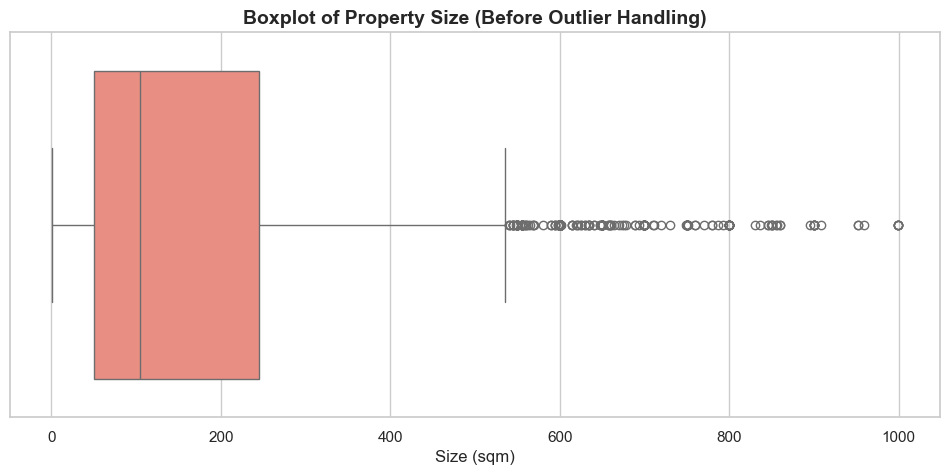

🔻 Lower outliers replaced: 0
🔺 Upper outliers replaced: 293
🔁 Total outliers replaced: 293


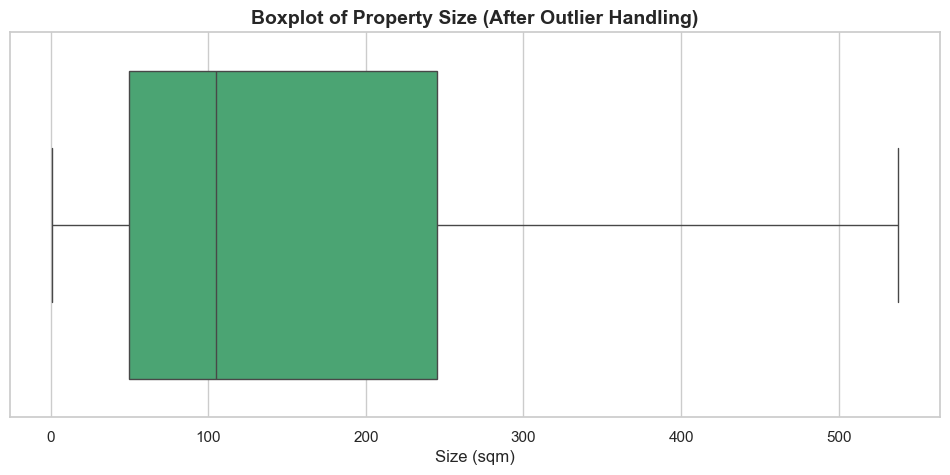

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seaborn theme
sns.set(style="whitegrid")

# Step 1: Boxplot BEFORE
plt.figure(figsize=(12, 5))
sns.boxplot(x=combined_df['size'], color='salmon')
plt.title('Boxplot of Property Size (Before Outlier Handling)', fontsize=14, fontweight='bold')
plt.xlabel('Size (sqm)', fontsize=12)
plt.show()

# Step 2: Calculate IQR and bounds
Q1 = combined_df['size'].quantile(0.25)
Q3 = combined_df['size'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Count outliers
num_lower_outliers = (combined_df['size'] < lower_bound).sum()
num_upper_outliers = (combined_df['size'] > upper_bound).sum()
total_outliers = num_lower_outliers + num_upper_outliers

print(f"🔻 Lower outliers replaced: {num_lower_outliers}")
print(f"🔺 Upper outliers replaced: {num_upper_outliers}")
print(f"🔁 Total outliers replaced: {total_outliers}")

# Step 4: Replace outliers
combined_df['size'] = combined_df['size'].apply(
    lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
)

# Step 5: Boxplot AFTER
plt.figure(figsize=(12, 5))
sns.boxplot(x=combined_df['size'], color='mediumseagreen')
plt.title('Boxplot of Property Size (After Outlier Handling)', fontsize=14, fontweight='bold')
plt.xlabel('Size (sqm)', fontsize=12)
plt.show()


In [52]:
combined_df.dtypes

property_title            object
location                  object
number_of_rooms           object
price                     object
size                     float64
property_type             object
property_type_encoded      int64
location_clean            object
location_encoded           int64
number_of_rooms_clean    float64
dtype: object

## Price

In [53]:
combined_df['price']

0         OMR300
1         OMR500
2       OMR1,500
3         OMR370
4           OMR4
          ...   
5523     OMR 110
5524     OMR 115
5525     OMR 100
5526     OMR 425
5527     OMR 120
Name: price, Length: 5523, dtype: object

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean the price column — convert to numeric after removing 'OMR' and commas
combined_df['price_clean'] = (
    combined_df['price']
    .astype(str)  # Convert all values to string first
    .str.replace('OMR', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

combined_df['price_clean'] = pd.to_numeric(combined_df['price_clean'], errors='coerce')

# Step 2: Remove zero or negative prices
positive_price_df = combined_df[combined_df['price_clean'] > 0].copy()

In [55]:
combined_df['price']

0         OMR300
1         OMR500
2       OMR1,500
3         OMR370
4           OMR4
          ...   
5523     OMR 110
5524     OMR 115
5525     OMR 100
5526     OMR 425
5527     OMR 120
Name: price, Length: 5523, dtype: object

In [56]:
combined_df['price'].describe()

count       5499
unique       448
top       OMR 50
freq         384
Name: price, dtype: object

In [57]:
null_count = combined_df['price'].isnull().sum()
print(f"Number of null values in 'price': {null_count}")

Number of null values in 'price': 24


In [58]:
combined_df = combined_df.dropna(subset=['price'])

In [59]:
combined_df.shape

(5499, 11)

In [60]:
combined_df.dtypes

property_title            object
location                  object
number_of_rooms           object
price                     object
size                     float64
property_type             object
property_type_encoded      int64
location_clean            object
location_encoded           int64
number_of_rooms_clean    float64
price_clean              float64
dtype: object

In [61]:
combined_df.to_csv('cleaned_properties.csv', index=False, encoding='utf-8-sig')

In [62]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

objList = combined_df.select_dtypes(include = "object").columns

for obj in objList:
    combined_df[obj] = lb.fit_transform(combined_df[obj].astype(str))

In [63]:
import numpy as np

# Create new features based on existing ones

# Size per room (avoid division by zero by adding a small number)
combined_df['size_per_room'] = combined_df['size'] / (combined_df['number_of_rooms_clean'] + 1e-5)

# Log-transform size and number of rooms (to reduce skewness)
combined_df['log_size'] = np.log1p(combined_df['size'])
combined_df['log_rooms'] = np.log1p(combined_df['number_of_rooms_clean'])

# Polynomial features for size and rooms
combined_df['size_squared'] = combined_df['size'] ** 2
combined_df['rooms_squared'] = combined_df['number_of_rooms_clean'] ** 2
combined_df['size_x_rooms'] = combined_df['size'] * combined_df['number_of_rooms_clean']

In [64]:
combined_df.dtypes

property_title             int64
location                   int64
number_of_rooms            int64
price                      int64
size                     float64
property_type              int64
property_type_encoded      int64
location_clean             int64
location_encoded           int64
number_of_rooms_clean    float64
price_clean              float64
size_per_room            float64
log_size                 float64
log_rooms                float64
size_squared             float64
rooms_squared            float64
size_x_rooms             float64
dtype: object

In [65]:
combined_df

,property_title,location,number_of_rooms,price,size,property_type,property_type_encoded,location_clean,location_encoded,number_of_rooms_clean,price_clean,size_per_room,log_size,log_rooms,size_squared,rooms_squared,size_x_rooms
0,384,3,8,415,128.566305,0,0,2,2,2.0,300.0,64.282831,4.864193,1.098612,16529.294725,4.0,257.132610
1,384,88,8,431,128.566305,0,0,68,68,2.0,500.0,64.282831,4.864193,1.098612,16529.294725,4.0,257.132610
2,632,58,15,389,142.292934,9,9,43,43,4.0,1500.0,35.573145,4.964891,1.609438,20247.279130,16.0,569.171737
3,1343,45,14,422,79.628485,11,11,34,34,6.0,370.0,13.271392,4.389852,1.945910,6340.695599,36.0,477.770909
4,1336,39,8,425,128.671024,2,2,32,32,2.0,4.0,64.335191,4.865001,1.098612,16556.232518,4.0,257.342049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,2654,29,1,78,70.000000,9,9,66,66,1.0,110.0,69.999300,4.262680,0.693147,4900.000000,1.0,70.000000
5524,2530,9,11,80,250.000000,9,9,7,7,3.0,115.0,83.333056,5.525453,1.386294,62500.000000,9.0,750.000000
5525,2687,9,1,73,100.000000,9,9,7,7,1.0,100.0,99.999000,4.615121,0.693147,10000.000000,1.0,100.000000
5526,302,57,8,244,125.000000,9,9,44,44,2.0,425.0,62.499688,4.836282,1.098612,15625.000000,4.0,250.000000


In [66]:
# Count nulls in each column
combined_df.isnull().sum()

property_title           0
location                 0
number_of_rooms          0
price                    0
size                     0
property_type            0
property_type_encoded    0
location_clean           0
location_encoded         0
number_of_rooms_clean    0
price_clean              0
size_per_room            0
log_size                 0
log_rooms                0
size_squared             0
rooms_squared            0
size_x_rooms             0
dtype: int64

In [67]:
combined_df.duplicated().sum()


np.int64(396)

In [68]:
combined_df = combined_df.drop_duplicates().reset_index(drop=True)

In [69]:
combined_df.shape

(5103, 17)

In [70]:
combined_df.to_csv('last_version.csv', index=False)

In [72]:
combined_df.columns

Index(['property_title', 'location', 'number_of_rooms', 'price', 'size',
       'property_type', 'property_type_encoded', 'location_clean',
       'location_encoded', 'number_of_rooms_clean', 'price_clean',
       'size_per_room', 'log_size', 'log_rooms', 'size_squared',
       'rooms_squared', 'size_x_rooms'],
      dtype='object')